# This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.


https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("Admission_Predict.csv")

# Display the first few rows of the DataFrame to verify the data
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [8]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:

df = df.drop(columns=['Serial No.'], errors='ignore')

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Admission_Predict.csv')

# Drop the column 'Serial No.' if it exists
df = df.drop(columns=['Serial No.'], errors='ignore')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Admission_Predict.csv")

# Adjust according to the exact column name
X = df.drop(["Chance of Admit ", "Serial No."], axis=1)
y = df["Chance of Admit "]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2



(0.004617003377285005, 0.8212082591486993)

In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
8/8 - 2s - 264ms/step - loss: 11.6544 - mae: 3.0707 - val_loss: 2.4823 - val_mae: 1.5583
Epoch 2/100
8/8 - 0s - 12ms/step - loss: 2.3773 - mae: 1.3280 - val_loss: 3.3469 - val_mae: 1.8159
Epoch 3/100
8/8 - 0s - 17ms/step - loss: 1.6954 - mae: 1.1800 - val_loss: 0.1018 - val_mae: 0.2656
Epoch 4/100
8/8 - 0s - 12ms/step - loss: 0.5436 - mae: 0.6375 - val_loss: 0.8710 - val_mae: 0.8927
Epoch 5/100
8/8 - 0s - 13ms/step - loss: 0.3645 - mae: 0.5061 - val_loss: 0.1511 - val_mae: 0.3321
Epoch 6/100
8/8 - 0s - 17ms/step - loss: 0.1551 - mae: 0.3328 - val_loss: 0.0723 - val_mae: 0.2152
Epoch 7/100
8/8 - 0s - 17ms/step - loss: 0.0824 - mae: 0.2357 - val_loss: 0.0999 - val_mae: 0.2482
Epoch 8/100
8/8 - 0s - 17ms/step - loss: 0.0650 - mae: 0.2053 - val_loss: 0.0866 - val_mae: 0.2320
Epoch 9/100
8/8 - 0s - 10ms/step - loss: 0.0583 - mae: 0.1967 - val_loss: 0.0586 - val_mae: 0.1950
Epoch 10/100
8/8 - 0s - 25ms/step - loss: 0.0512 - mae: 0.1838 - val_loss: 0.0625 - val_mae: 0.2003
Epoch 1

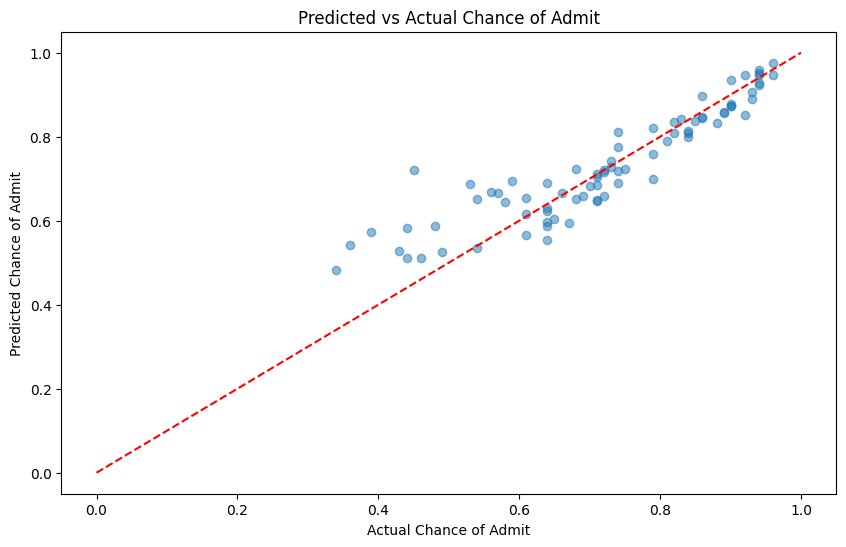

Actual: 0.68, Predicted: 0.6511744621562403
Actual: 0.68, Predicted: 0.7236874052880304
Actual: 0.9, Predicted: 0.9353680948898282
Actual: 0.79, Predicted: 0.8216431599284457
Actual: 0.44, Predicted: 0.5815867330167592
Actual: 0.94, Predicted: 0.9286301577067626
Actual: 0.43, Predicted: 0.5268236567111317
Actual: 0.36, Predicted: 0.5430899321465712
Actual: 0.72, Predicted: 0.659405829089416
Actual: 0.85, Predicted: 0.8383492373472488


In [20]:
import matplotlib.pyplot as plt
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Predicted vs Actual Chance of Admit')
plt.show()
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

In [21]:

# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}')

Actual: 0.6800, Predicted: 0.6512
Actual: 0.6800, Predicted: 0.7237
Actual: 0.9000, Predicted: 0.9354
Actual: 0.7900, Predicted: 0.8216
Actual: 0.4400, Predicted: 0.5816
Actual: 0.9400, Predicted: 0.9286
Actual: 0.4300, Predicted: 0.5268
Actual: 0.3600, Predicted: 0.5431
Actual: 0.7200, Predicted: 0.6594
Actual: 0.8500, Predicted: 0.8383


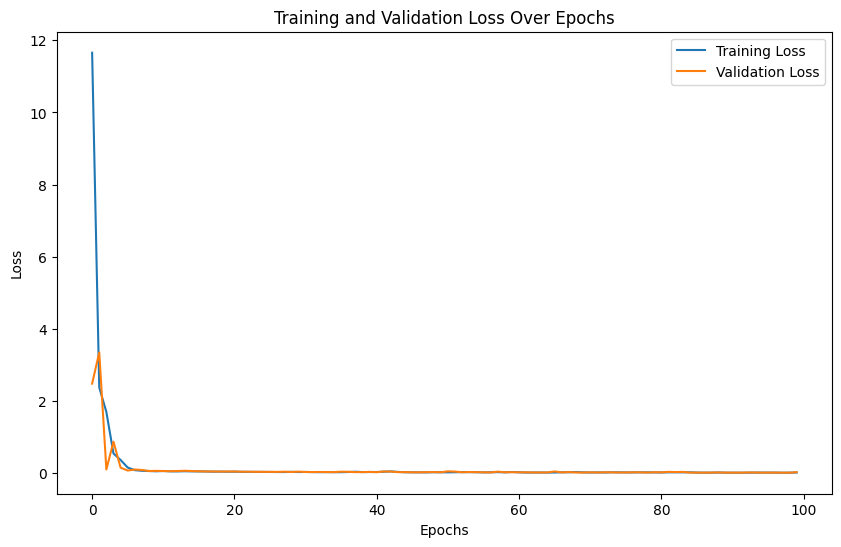

In [22]:

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()